<a href="https://colab.research.google.com/github/kushalm01/Covid19/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fetched the data from https://ourworldindata.org/grapher/weekly-covid-cases

import pandas as pd

url="https://ourworldindata.org/grapher/weekly-covid-cases.csv?v=1&csvType=full&useColumnShortNames=true"

df = pd.read_csv(url, storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
df.info()
print(f"{df.shape[0]} rows and {df.shape[1]} columns.")
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499878 entries, 0 to 499877
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Entity        499878 non-null  object
 1   Code          469578 non-null  object
 2   Day           499878 non-null  object
 3   weekly_cases  499878 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 15.3+ MB
499878 rows and 4 columns.


,Entity,Code,Day,weekly_cases
499873,Zimbabwe,ZWE,2025-07-16,0
499874,Zimbabwe,ZWE,2025-07-17,0
499875,Zimbabwe,ZWE,2025-07-18,0
499876,Zimbabwe,ZWE,2025-07-19,0
499877,Zimbabwe,ZWE,2025-07-20,0


In [ ]:
# Rename columns and  Covert date to a date time datatype
df.rename(columns={'Entity':'Country', 'Code':'Country_code','Day': 'Date'} ,inplace=True)
df['Date']=pd.to_datetime(df['Date'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499878 entries, 0 to 499877
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Country       499878 non-null  object        
 1   Country_code  469578 non-null  object        
 2   Date          499878 non-null  datetime64[ns]
 3   weekly_cases  499878 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.3+ MB


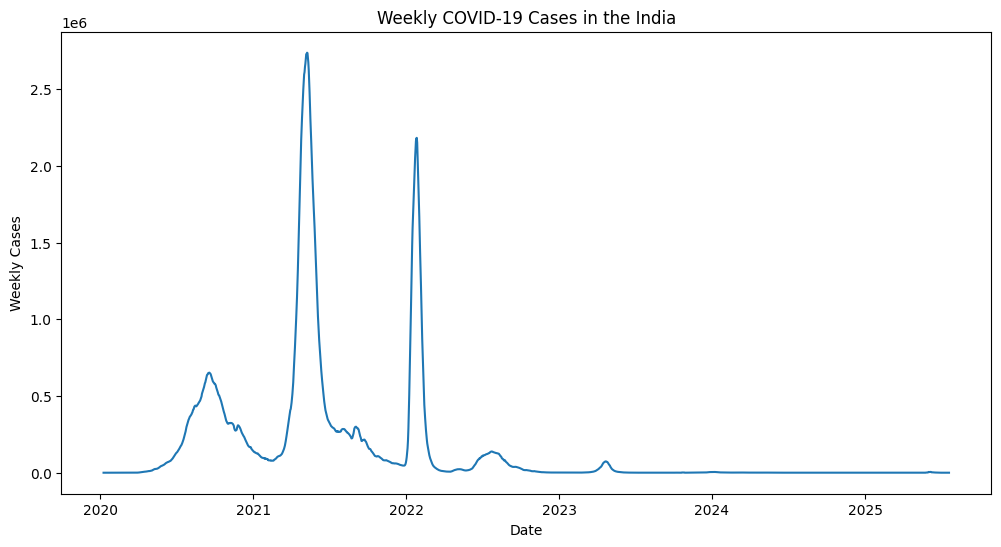

In [ ]:
# lets look for india
import matplotlib.pyplot as plt


india_data = df[df['Country'] == 'India']

plt.figure(figsize=(12, 6))
plt.plot(india_data['Date'], india_data['weekly_cases'])
plt.title('Weekly COVID-19 Cases in the India')
plt.xlabel('Date')
plt.ylabel('Weekly Cases')
plt.show()

In [ ]:

df['Country'].unique()
# "country" Data also include few groups

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia excl. China',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eri

In [ ]:
# To only have countries in our dataset

entities_to_exclude = [
    'World', 'World excl. China', 'World excl. China and South Korea',
    'World excl. China, South Korea, Japan and Singapore',
    'High-income countries', 'Upper-middle-income countries',
    'Low-income countries', 'Lower-middle-income countries',
    'Asia', 'Asia excl. China', 'Europe', 'European Union (27)',
    'Africa', 'North America', 'South America', 'Oceania'
]

# Filter the DataFrame to remove these entities
countries_only_df = df[~df['Country'].isin(entities_to_exclude)].copy()
countries_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467558 entries, 0 to 499877
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Country       467558 non-null  object        
 1   Country_code  467558 non-null  object        
 2   Date          467558 non-null  datetime64[ns]
 3   weekly_cases  467558 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 17.8+ MB


In [ ]:
#Loading the filtered data into a database for using sql and powerBI
import sqlite3
import pandas as pd


conn = sqlite3.connect('covid_countries_data.db')

countries_only_df.to_sql('weekly_cases_by_country', conn, if_exists='replace', index=False)

print("Filtered data successfully loaded into the 'weekly_cases_by_country' table.")

Filtered data successfully loaded into the 'weekly_cases_by_country' table.


In [ ]:

conn = sqlite3.connect('covid_countries_data.db')

# SQL query
query = """
SELECT *
FROM weekly_cases_by_country
LIMIT 5;
"""

# Run the query using pandas and get the results as a DataFrame
results_df = pd.read_sql_query(query, conn)

print(results_df)

# Close the connection
conn.close()

       Country Country_code                 Date  weekly_cases
0  Afghanistan          AFG  2020-01-09 00:00:00             0
1  Afghanistan          AFG  2020-01-10 00:00:00             0
2  Afghanistan          AFG  2020-01-11 00:00:00             0
3  Afghanistan          AFG  2020-01-12 00:00:00             0
4  Afghanistan          AFG  2020-01-13 00:00:00             0
